In [1]:
# imports
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import re

In [2]:
file = '/content/mv.csv'
sent_data = pd.read_csv(file)

In [3]:
sent_data.head()

,text,majority_vote
0,what cards do you offer?,visa_or_mastercard
1,how do i use my card if i lost my phone?,lost_or_stolen_phone
2,can i select my card scheme or do you choose i...,visa_or_mastercard
3,where do i top up my google pay?,apple_pay_or_google_pay
4,"can i change my pin at atms? if so, what ones?",change_pin


In [5]:
sent_data['majority_vote'].unique()

array(['visa_or_mastercard', 'lost_or_stolen_phone',
       'apple_pay_or_google_pay', 'change_pin'], dtype=object)

In [6]:
sent_data.shape

(120, 2)

In [3]:
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
text = sent_data['text'].values

In [9]:
# text

In [5]:
sent  = sent_data['majority_vote'].values #  or sent_data[:,5]  will be in array type

In [9]:
type(text)

numpy.ndarray

In [6]:
text_tokens_full = [re.sub(r'\W+',' ',x) for x in text]

In [11]:
text_tokens_full

['what cards do you offer ',
 'how do i use my card if i lost my phone ',
 'can i select my card scheme or do you choose it for me ',
 'where do i top up my google pay ',
 'can i change my pin at atms if so what ones ',
 'how do i set up my apple pay watch to connect to my account',
 'is it possible to obtain both a visa and a mastercard from you ',
 'can i choose my visa or mastercard ',
 'can i change my pin at a nearby atm when in spain i think someone saw my pin and i need to change it but am on vacation ',
 'what do i do if i can t access the app ',
 'i do not want a visa card ',
 'visa and mastercard can i get them both ',
 'if i want to can i set up a new pin ',
 'is there anything to do because my phone was stolen ',
 'can i use my apple watch to top up ',
 'which countries can i change my pin in ',
 'please give me both a visa and a mastercard ',
 'i can t get my google pay top to work are there any issues on your end ',
 'how can i set up google pay on my device ',
 'can my p

In [7]:
stemmer = PorterStemmer()

text_tokens = [[stemmer.stem(w) for w in x.split()] for x in text_tokens_full]

In [13]:
text_tokens

[['what', 'card', 'do', 'you', 'offer'],
 ['how', 'do', 'i', 'use', 'my', 'card', 'if', 'i', 'lost', 'my', 'phone'],
 ['can',
  'i',
  'select',
  'my',
  'card',
  'scheme',
  'or',
  'do',
  'you',
  'choos',
  'it',
  'for',
  'me'],
 ['where', 'do', 'i', 'top', 'up', 'my', 'googl', 'pay'],
 ['can', 'i', 'chang', 'my', 'pin', 'at', 'atm', 'if', 'so', 'what', 'one'],
 ['how',
  'do',
  'i',
  'set',
  'up',
  'my',
  'appl',
  'pay',
  'watch',
  'to',
  'connect',
  'to',
  'my',
  'account'],
 ['is',
  'it',
  'possibl',
  'to',
  'obtain',
  'both',
  'a',
  'visa',
  'and',
  'a',
  'mastercard',
  'from',
  'you'],
 ['can', 'i', 'choos', 'my', 'visa', 'or', 'mastercard'],
 ['can',
  'i',
  'chang',
  'my',
  'pin',
  'at',
  'a',
  'nearbi',
  'atm',
  'when',
  'in',
  'spain',
  'i',
  'think',
  'someon',
  'saw',
  'my',
  'pin',
  'and',
  'i',
  'need',
  'to',
  'chang',
  'it',
  'but',
  'am',
  'on',
  'vacat'],
 ['what', 'do', 'i', 'do', 'if', 'i', 'can', 't', 'access

In [8]:
tf = TfidfVectorizer(stop_words='english',use_idf=False,norm = None,binary=False,lowercase=True)
text_tokens_feat = tf.fit_transform([' '.join(x) for x in text_tokens])
feature_names = tf.get_feature_names_out()
pd.set_option('Display.max_columns',50)

first_ten_rows = pd.DataFrame(text_tokens_feat.toarray()[:10],columns=feature_names)
first_ten_rows

,abl,abroad,accept,access,account,allow,american,amex,ani,anyth,anywher,app,appl,appli,atm,away,banana,bank,bay,becaus,branch,cancel,card,cash,caus,...,step,stole,stolen,stop,tell,thi,thief,think,took,transact,travel,tri,unabl,use,vacat,visa,visit,wa,want,watch,way,whi,won,work,yesterday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
pd.DataFrame(text_tokens_feat.toarray()[:7],columns=[i for i in range(145)])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
first_ten_rows.shape

(10, 145)

In [9]:
le  = LabelEncoder()
sent = le.fit_transform(sent)
class_labels = le.classes_

In [16]:
class_labels

array(['apple_pay_or_google_pay', 'change_pin', 'lost_or_stolen_phone',
       'visa_or_mastercard'], dtype=object)

In [17]:
sent

array([3, 2, 3, 0, 1, 0, 3, 3, 1, 2, 3, 3, 1, 2, 0, 1, 3, 0, 0, 1, 2, 1,
       0, 0, 2, 0, 0, 3, 2, 2, 0, 0, 3, 0, 2, 3, 1, 3, 2, 3, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 3, 3, 3, 1, 1, 3, 0,
       2, 1, 1, 2, 3, 1, 3, 0, 1, 0, 1, 1, 3, 0, 0, 3, 1, 2, 1, 0, 3, 1,
       0, 1, 3, 3, 1, 1, 3, 3, 3, 0, 1, 3, 3, 2, 3, 3, 1, 0, 1, 3, 0, 2,
       0, 2, 3, 3, 1, 1, 2, 1, 0, 0])

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
X_train,X_test,y_train,y_test = train_test_split(text_tokens_feat,sent,test_size=0.2,random_state=42)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

Test F1 score: 0.8020833333333334
Test accuracy: 0.875
Train F1 score: 1.0
Train accuracy: 1.0


In [13]:
X_train,X_test,y_train,y_test = train_test_split(text_tokens_feat,sent,test_size=0.2,random_state=42)
clf = LinearSVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

Test F1 score: 0.7725490196078431
Test accuracy: 0.8333333333333334
Train F1 score: 1.0
Train accuracy: 1.0


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train,X_test,y_train,y_test = train_test_split(text_tokens_feat,sent,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))


Test F1 score: 0.8960227272727272
Test accuracy: 0.9166666666666666
Train F1 score: 1.0
Train accuracy: 1.0


In [ ]:
# pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 5.1.0
    Uninstalling sentence-transformers-5.1.0:
      Successfully uninstalled sentence-transformers-5.1.0


In [27]:

# from sentence_transformers import SentenceTransformer
# # Load a pretrained Sentence Transformer model
# model = SentenceTransformer("all-MiniLM-L6-v2")

# # The sentences to encode
# sentences = [
#     "The weather is lovely today.",
#     "It's so sunny outside!",
#     "He drove to the stadium.",
# ]

# # Calculate embeddings by calling model.encode()
# embeddings = model.encode(sentences)
# print(embeddings.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(3, 384)


In [16]:
from sentence_transformers import SentenceTransformer
# Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")
sentences =  [' '.join(x) for x in text_tokens]
# Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [39]:
cos_sim = model.similarity(embeddings,embeddings)
print(cos_sim)

tensor([[1.0000, 0.3132, 0.5692,  ..., 0.2119, 0.1197, 0.1131],
        [0.3132, 1.0000, 0.3811,  ..., 0.3877, 0.1400, 0.0181],
        [0.5692, 0.3811, 1.0000,  ..., 0.3503, 0.1079, 0.1715],
        ...,
        [0.2119, 0.3877, 0.3503,  ..., 1.0000, 0.1693, 0.0526],
        [0.1197, 0.1400, 0.1079,  ..., 0.1693, 1.0000, 0.3331],
        [0.1131, 0.0181, 0.1715,  ..., 0.0526, 0.3331, 1.0000]])


In [42]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(embeddings,embeddings)
print(cos_sim)

[[1.0000001  0.31315795 0.56919587 ... 0.21193612 0.11968474 0.11314153]
 [0.31315795 1.0000001  0.3810836  ... 0.38767272 0.13995855 0.01810927]
 [0.56919587 0.3810836  0.9999999  ... 0.35033074 0.10793226 0.17147028]
 ...
 [0.21193612 0.38767272 0.35033074 ... 1.         0.16933547 0.0525679 ]
 [0.11968474 0.13995855 0.10793226 ... 0.16933547 0.9999999  0.33305085]
 [0.11314153 0.01810927 0.17147028 ... 0.0525679  0.33305085 1.0000002 ]]


In [ ]:
# embeddings = model.encode(sentences)

In [ ]:
# aa =  [' '.join(x) for x in text_tokens]
# embeddings_ = model.encode(aa)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(embeddings,sent,test_size=0.2,random_state=42)
clf = LinearSVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

Test F1 score: 0.8020833333333334
Test accuracy: 0.875
Train F1 score: 0.9901960784313726
Train accuracy: 0.9895833333333334


In [20]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

Test F1 score: 0.8960227272727272
Test accuracy: 0.9166666666666666
Train F1 score: 1.0
Train accuracy: 1.0


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_test = clf.predict(X_test)
print('Test F1 score:', f1_score(y_test, y_pred_test, average='macro'))
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

# Predictions on training set
y_pred_train = clf.predict(X_train)
print('Train F1 score:', f1_score(y_train, y_pred_train, average='macro'))
print('Train accuracy:', accuracy_score(y_train, y_pred_train))

Test F1 score: 0.8391025641025642
Test accuracy: 0.9166666666666666
Train F1 score: 0.938042934154794
Train accuracy: 0.9375


In [12]:
import torch
from torch.nn.functional import binary_cross_entropy,softmax
from torch.autograd import Variable
from torch.nn import CrossEntropyLoss

In [13]:
W = torch.randn(X_train.shape[1], 4, dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, 4, dtype=torch.float32, requires_grad=True)

In [51]:
W.shape

torch.Size([96, 2])

In [52]:
b.shape

torch.Size([1, 2])

In [54]:
W + b

tensor([[0.5449, 0.6514],
        [0.4681, 0.2873],
        [0.6916, 0.4111],
        [0.8479, 0.7612],
        [0.9213, 0.8653],
        [0.6918, 0.6827],
        [0.0365, 0.5868],
        [0.6821, 0.7236],
        [0.4000, 0.5196],
        [0.3323, 0.0992],
        [0.0520, 0.7035],
        [0.5452, 0.0179],
        [0.5547, 0.0566],
        [0.4929, 0.4138],
        [0.8879, 0.7249],
        [0.0173, 0.5792],
        [0.3417, 0.9222],
        [0.4672, 0.6279],
        [0.5732, 0.3865],
        [0.2277, 0.2806],
        [0.7032, 0.1794],
        [0.3045, 0.0687],
        [0.0518, 0.4943],
        [0.6846, 0.6620],
        [0.0488, 0.4298],
        [0.9624, 0.3363],
        [0.8809, 0.8527],
        [0.7888, 0.6173],
        [0.7503, 0.8499],
        [0.7731, 0.1679],
        [0.2083, 0.5987],
        [0.6643, 0.3977],
        [0.4331, 0.0187],
        [0.8108, 0.0743],
        [0.1941, 0.9196],
        [0.0332, 0.3051],
        [0.4362, 0.8962],
        [0.0308, 0.7409],
        [0.5

In [16]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

In [28]:
type(X_train)

torch.Tensor

In [56]:
X_train.shape

torch.Size([96, 384])

In [36]:
W.shape

torch.Size([384, 4])

In [25]:
type(W)

torch.Tensor

In [44]:
CrossEntropyLoss = torch.nn.CrossEntropyLoss()
losses = []
step=0.1
for _ in range(1000):
  #Forward pass
  y_pred = softmax(torch.tensor(X_train).mm(W)+b,dim=1)

  # Error computations
  loss =  CrossEntropyLoss(y_pred,torch.tensor(y_train))
  print("The loss is %.3f"%loss)
  losses.append(loss)

  # compute gradients/backpropagation
  loss.backward()

  #update values
  W.data -= step*W.grad.data
  b.data -= step*b.grad.data

  #Erase gradient values
  W.grad.data.zero_()
  b.grad.data.zero_();


/tmp/ipython-input-2076177294.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = softmax(torch.tensor(X_train).mm(W)+b,dim=1)
/tmp/ipython-input-2076177294.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss =  CrossEntropyLoss(y_pred,torch.tensor(y_train))


The loss is 0.973
The loss is 0.973
The loss is 0.973
The loss is 0.973
The loss is 0.972
The loss is 0.972
The loss is 0.972
The loss is 0.972
The loss is 0.972
The loss is 0.971
The loss is 0.971
The loss is 0.971
The loss is 0.971
The loss is 0.971
The loss is 0.970
The loss is 0.970
The loss is 0.970
The loss is 0.970
The loss is 0.970
The loss is 0.970
The loss is 0.969
The loss is 0.969
The loss is 0.969
The loss is 0.969
The loss is 0.969
The loss is 0.968
The loss is 0.968
The loss is 0.968
The loss is 0.968
The loss is 0.968
The loss is 0.968
The loss is 0.967
The loss is 0.967
The loss is 0.967
The loss is 0.967
The loss is 0.967
The loss is 0.966
The loss is 0.966
The loss is 0.966
The loss is 0.966
The loss is 0.966
The loss is 0.966
The loss is 0.965
The loss is 0.965
The loss is 0.965
The loss is 0.965
The loss is 0.965
The loss is 0.964
The loss is 0.964
The loss is 0.964
The loss is 0.964
The loss is 0.964
The loss is 0.964
The loss is 0.963
The loss is 0.963
The loss i

In [45]:
losses = [item.detach().numpy() for item in losses]

In [14]:
import matplotlib.pyplot as plt

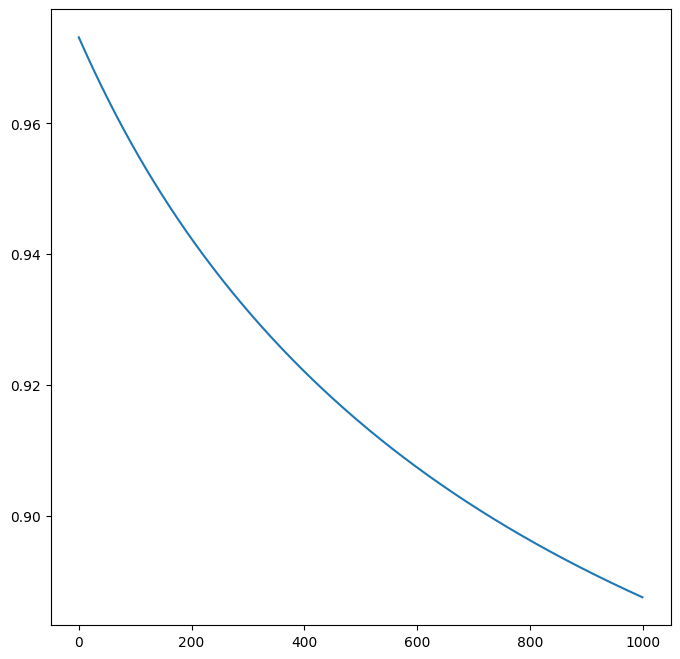

In [47]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

In [48]:
CrossEntropyLoss = torch.nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD([W,b],lr=0.1)
losses = []

for _ in range(1000):
  #Forward pass
  y_pred = softmax(torch.tensor(X_train).mm(W)+b,dim=1)

  # Error computations
  loss =  CrossEntropyLoss(y_pred,torch.tensor(y_train))
  print("The loss is %.3f"%loss)
  losses.append(loss)

  # compute gradients/backpropagation
  loss.backward()

  #update values
  Optimizer.step()

  #Erase gradient values
  Optimizer.zero_grad();






/tmp/ipython-input-2091236640.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = softmax(torch.tensor(X_train).mm(W)+b,dim=1)
/tmp/ipython-input-2091236640.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss =  CrossEntropyLoss(y_pred,torch.tensor(y_train))


The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.887
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.886
The loss is 0.885
The loss is 0.885
The loss is 0.885
The loss i

In [50]:
acc=((torch.max(y_pred,1)[1]==torch.max(y_train,1)[1]).type(torch.FloatTensor).sum()/300.0).data
print("An accuracy of %.1f%%."%(acc*100))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [51]:
with torch.no_grad():
    preds = torch.argmax(y_pred, dim=1)   # predicted class indices
    acc = (preds == y_train).float().mean().item()
print(f"Accuracy: {acc*100:.1f}%")

Accuracy: 92.7%


In [56]:
with torch.no_grad():  # disable gradient tracking
    test_logits = torch.tensor(X_test) @ W + b
    test_preds = torch.argmax(test_logits, dim=1)
    test_acc = (test_preds == torch.tensor(y_test)).float().mean().item()
print(f"Test Accuracy: {test_acc*100:.1f}%")


Test Accuracy: 87.5%


In [ ]:
from

In [41]:
model = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1],3), # This is equivalent to perceptron
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(3,len(class_labels))).float()

In [59]:
len(class_labels)

4

In [42]:
CrossEntropyLoss = torch.nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
losses = []

for _ in range(1000):
  #Forward pass
  y_pred = model(torch.tensor(X_train))

  # Error computations
  loss =  CrossEntropyLoss(y_pred,torch.tensor(y_train))
  print("The loss is %.3f"%loss)
  losses.append(loss)

  # compute gradients/backpropagation
  loss.backward()

  #update values
  Optimizer.step()

  #Erase gradient values
  Optimizer.zero_grad();

The loss is 1.394
The loss is 1.387
The loss is 1.387
The loss is 1.386
The loss is 1.385
The loss is 1.381
The loss is 1.379
The loss is 1.376
The loss is 1.377
The loss is 1.379
The loss is 1.373
The loss is 1.371
The loss is 1.376
The loss is 1.370
The loss is 1.360
The loss is 1.371
The loss is 1.367
The loss is 1.366
The loss is 1.358
The loss is 1.356
The loss is 1.360
The loss is 1.359
The loss is 1.348
The loss is 1.348
The loss is 1.343
The loss is 1.340
The loss is 1.343
The loss is 1.334
The loss is 1.331
The loss is 1.332
The loss is 1.341
The loss is 1.338
The loss is 1.330
The loss is 1.338
The loss is 1.332
The loss is 1.324
The loss is 1.345
The loss is 1.329
The loss is 1.326
The loss is 1.318
The loss is 1.330
The loss is 1.304
The loss is 1.317
The loss is 1.317
The loss is 1.288
The loss is 1.302
The loss is 1.306
The loss is 1.295
The loss is 1.310
The loss is 1.295
The loss is 1.311
The loss is 1.302
The loss is 1.280
The loss is 1.261
The loss is 1.303
The loss i

In [43]:
losses = [item.detach().numpy() for item in losses]

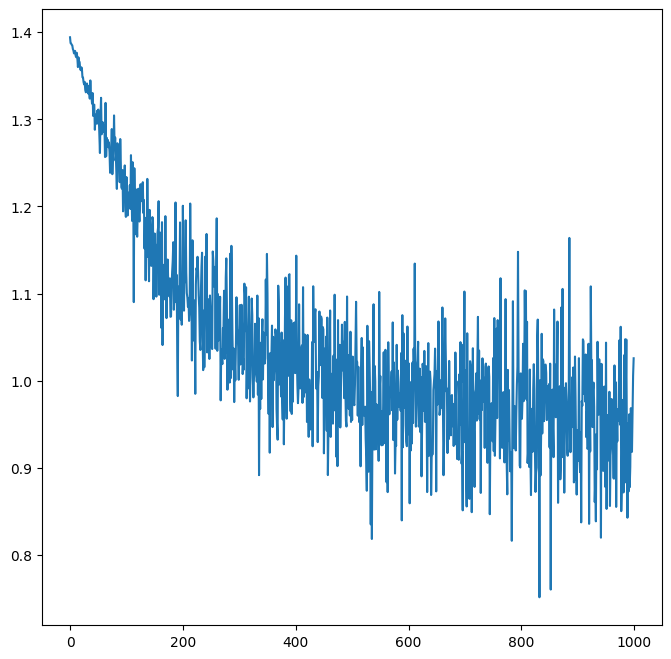

In [44]:
plt.figure(figsize=(8,8))
plt.plot(losses)
plt.show()

In [45]:
with torch.no_grad():
    preds = torch.argmax(y_pred, dim=1)   # predicted class indices
    acc = (preds == y_train).float().mean().item()
print(f"Accuracy: {acc*100:.1f}%")

Accuracy: 55.2%


In [46]:
with torch.no_grad():  # disable gradient tracking
    test_logits = torch.tensor(X_test) @ W + b
    test_preds = torch.argmax(test_logits, dim=1)
    test_acc = (test_preds == torch.tensor(y_test)).float().mean().item()
print(f"Test Accuracy: {test_acc*100:.1f}%")

Test Accuracy: 29.2%


In [ ]:
# Define a custom PyTorch model class, inheriting from torch.nn.Module
class OurModel(torch.nn.Module):

    # The __init__ method is where you define the layers and other model components.
    #                  input_size  hidden_size1  hidden_size2  ouput_size
    def __init__(self,D_in,       H1, H2, H3,          D_out):
        """
        In the constructor, we define three layers: two hidden layers and one output layer.

        Parameters:
        - D_in (int): Size of input features.
        - H1 (int): Size of the first hidden layer.
        - H2 (int): Size of the second hidden layer.
        - D_out (int): Size of the output layer.
        """

        # Call the __init__ method of the parent class (torch.nn.Module)
        super(OurModel,self).__init__()

        # Define the first linear layer, mapping from input to the first hidden layer.
        self.layer1 = torch.nn.Linear(D_in,H1)

        # Define the second linear layer, mapping from the first hidden layer to the second hidden layer.
        self.layer2 = torch.nn.Linear(H1,H2)

        self.layer3 = torch.nn.Linear(H2,H3)

        # Define the output layer, mapping from the second hidden layer to the output.
        self.outlayer = torch.nn.Linear(H3,D_out)

    # The forward method is where you define how your model is going to be run,
    # from input to output. It's the actual network transformation.
    def forward(self,x):
        """
        In the forward function, we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.

        Parameters:
        - x (torch.Tensor): Input tensor.

        Returns:
        - torch.Tensor: Output tensor after passing through the layers and activation functions.
        """

        # Pass input through the first layer and apply the tanh activation function.
        x = tanh(self.layer1(x))

        # Pass through the second layer and apply the tanh activation function.
        x = tanh(self.layer2(x))

        X = tanh(self.layer3(x))

        # Pass through the output layer and apply the softmax activation function.
        # The softmax function is often used for the output layer in classification tasks.
        return softmax(self.outlayer(x),dim=1)